# Track 3: Object Detection with LiDAR Data from Trondheim

## Imports

In [31]:
import os
import pandas as pd
import numpy as np
from helpers import *
import matplotlib.pyplot as plt


ImportError: cannot import name 'get_path' from 'helpers' (/home/henrilja/Datasyn/projectrepo/TDT4265_Project/helpers.py)

### Loading in the dataset (Cybele)

In [ ]:
DATAPATH = "/datasets/tdt4265/ad/NAPLab-LiDAR"
print("Data directory")
print(os.listdir(DATAPATH))


Data directory
['images', 'names.txt', 'labels_yolo_v1.1', 'train.txt', 'data.txt']


In [ ]:
print(read_file("data.txt"))

classes = 8
train = data/train.txt
names = names.txt




In [ ]:
print(read_file("names.txt"))

car
truck
bus
motorcycle
bicycle
scooter
person
rider



In [ ]:
train = pd.read_csv(get_path("train.txt"), sep=" ", header=None)
print(train.head())
train.describe()

NameError: name 'get_path' is not defined

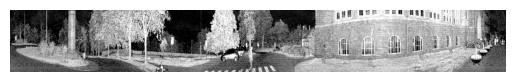

In [ ]:
image_path = os.path.join(DATAPATH, train.iloc[0, 0])
image = plt.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()
